# Kaggle Titanic ML competition

For Downloading the dataset (https://github.com/shubh2002/DataSets)

Overview
The data has been split into two groups:

training set (Titanic_train_dataset.csv)
The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

test set (Titanic_test_dataset.csv)
The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

In [58]:
"""Importing Libraries"""

import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

import warnings 
warnings.filterwarnings('ignore')

In [59]:
"""Reading training data"""

df_train=pd.read_csv('Titanic_train_dataset.csv')

# Exploring the training data

In [60]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [61]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [62]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [63]:
"""Features conatin null values"""
df_train.columns[df_train.isnull().any()]

Index(['Age', 'Cabin', 'Embarked'], dtype='object')

In [64]:
"""Percentage of null value in features"""
print(round((df_train.isnull().sum()*100)/len(df_train),2).sort_values(ascending=False).head(5))

Cabin       77.10
Age         19.87
Embarked     0.22
Fare         0.00
Ticket       0.00
dtype: float64


In [65]:
"""Saving the Survived value fro training data"""

y_train=df_train['Survived']

In [66]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

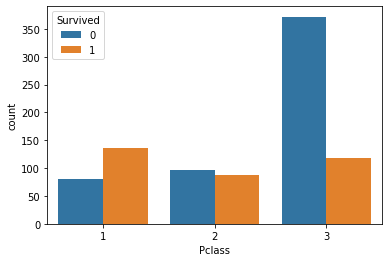

In [67]:
sns.countplot(x='Pclass',hue='Survived',data=df_train)

People in first class have more chance of surviving

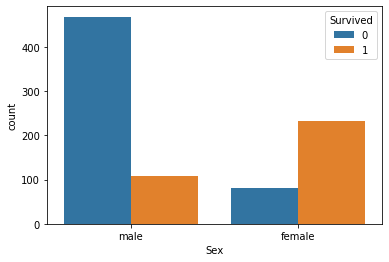

In [68]:
sns.countplot(x='Sex',hue='Survived',data=df_train)

Female survived more than male

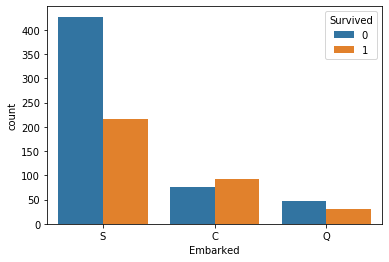

In [69]:
sns.countplot(x='Embarked',hue='Survived',data=df_train)

In [70]:
print(round((df_train.isnull().sum()*100)/len(df_train),2).sort_values(ascending=False))

Cabin          77.10
Age            19.87
Embarked        0.22
Fare            0.00
Ticket          0.00
Parch           0.00
SibSp           0.00
Sex             0.00
Name            0.00
Pclass          0.00
Survived        0.00
PassengerId     0.00
dtype: float64


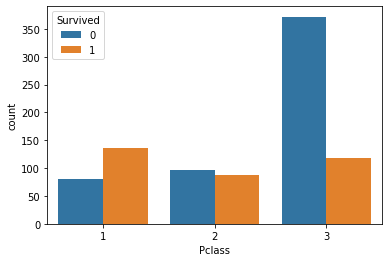

In [71]:
sns.countplot(x='Pclass',hue='Survived',data=df_train)

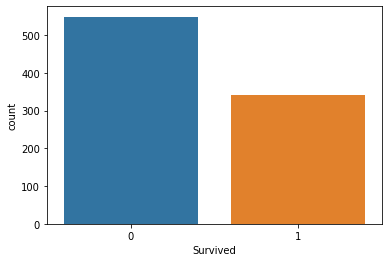

In [72]:
sns.countplot(x='Survived',data=df_train)

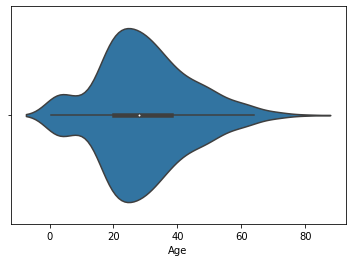

In [73]:
sns.violinplot(df_train['Age'])

In [74]:
df_train.groupby(['Sex']).Survived.sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

In [75]:
df_train.groupby(['Embarked']).Survived.sum()

Embarked
C     93
Q     30
S    217
Name: Survived, dtype: int64

In [76]:
df_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [77]:
df_train.groupby(['Pclass']).Survived.sum()

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

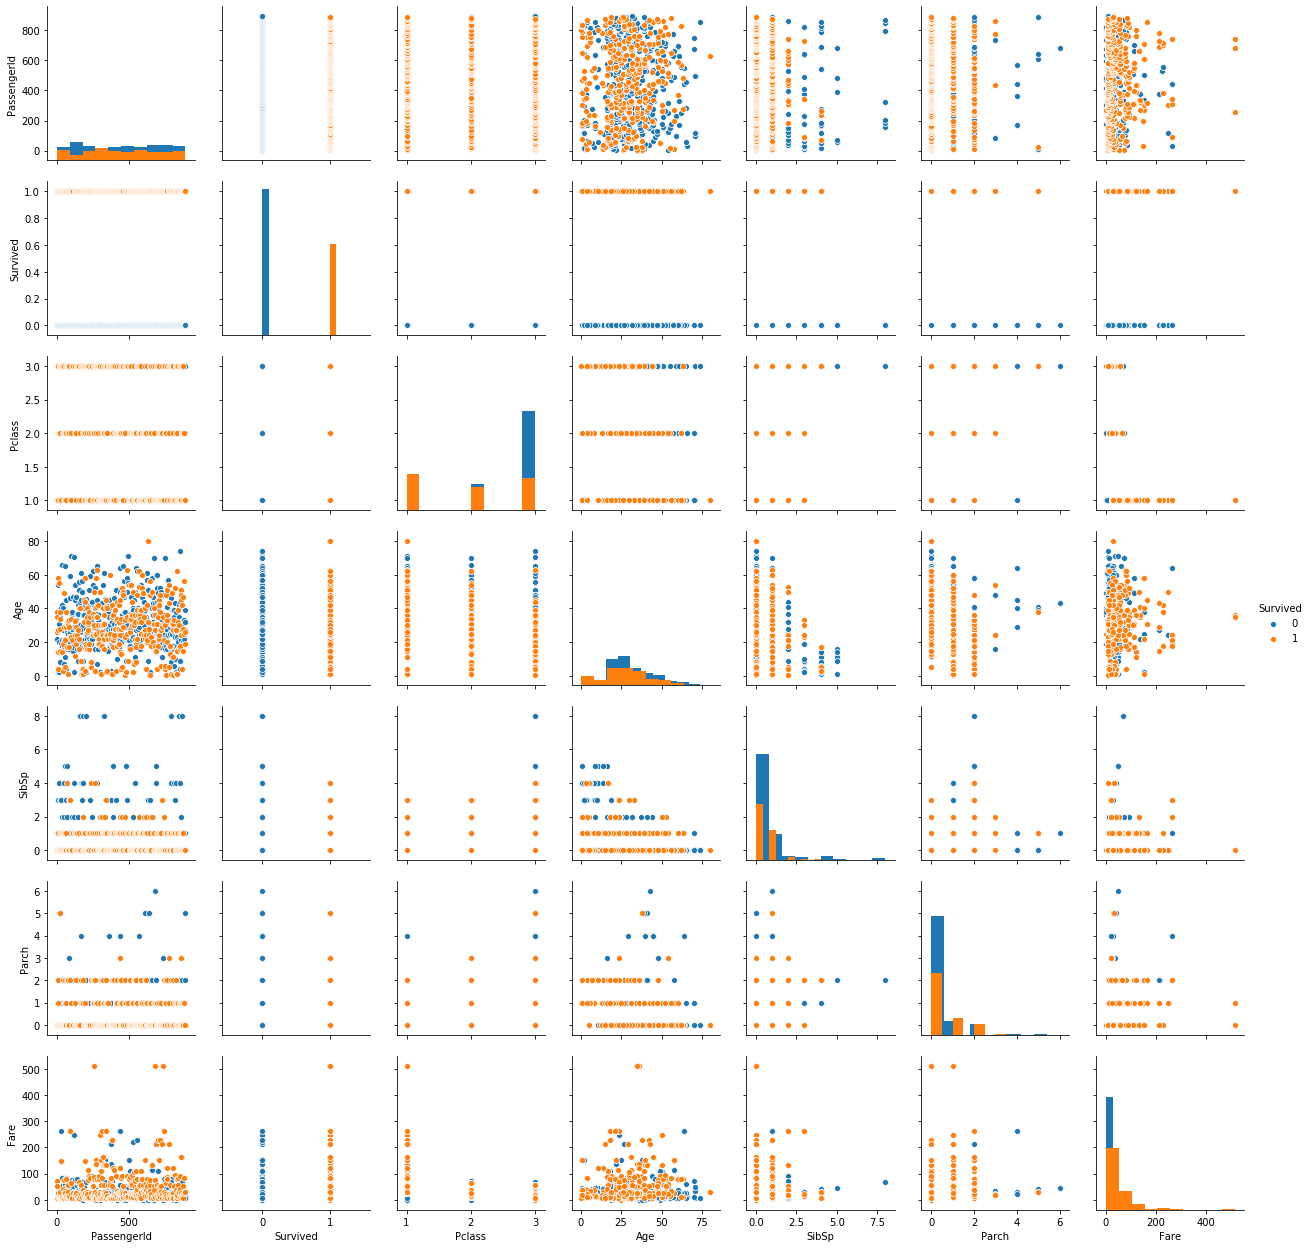

In [78]:
sns.pairplot(data=df_train,hue='Survived',kind='scatter',diag_kind='hist')

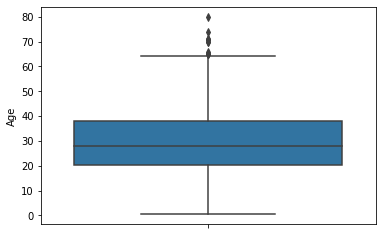

In [79]:
sns.boxplot(y='Age',data=df_train)

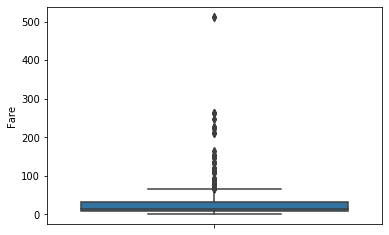

In [80]:
sns.boxplot(y='Fare',data=df_train)

In [81]:
df_train=df_train.drop(['Survived'],axis=1)

In [82]:
df_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [83]:
df_test=pd.read_csv('Titanic_test_dataset.csv')

In [84]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [85]:
"""Combining both dataset"""
data=pd.concat([df_train,df_test])

In [86]:
data.shape

(1309, 11)

In [87]:
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [88]:
"""Droping the column which are not useful for our prediction model"""
data=data.drop(['Name','PassengerId','Ticket'],axis=1)

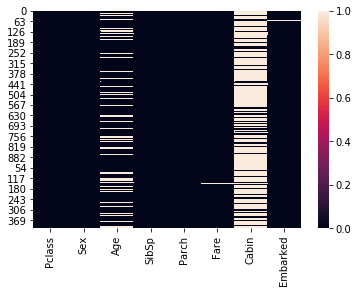

In [89]:
sns.heatmap(data.isnull())

In [90]:
"""Droping the column with more thn 50% null values"""
data=data.drop(['Cabin'],axis=1)

In [91]:
"""Checking remainig columns with null values"""
data.columns[data.isnull().any()]

Index(['Age', 'Fare', 'Embarked'], dtype='object')

In [92]:
"""Fillinng the null values"""

data['Age']=data['Age'].fillna(data['Age'].median())
data['Embarked']=data['Embarked'].fillna(data['Embarked'].mode()[0])
data['Fare']=data['Fare'].fillna(data['Fare'].median())

In [93]:
data.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [94]:
"""Name of the features with categorical values"""
obj_dtype_col=data.columns[data.dtypes == 'object']
obj_dtype_col

Index(['Sex', 'Embarked'], dtype='object')

In [95]:
"""Changing the Categorical value into numerical value"""
data=pd.get_dummies(data,columns=['Sex','Embarked'],drop_first=True)

In [96]:
data.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [97]:
data.shape

(1309, 8)

In [98]:
data_train=data.iloc[:891,:]
data_train.shape

(891, 8)

In [99]:
data_test=data.iloc[891:,:]
data_test.shape

(418, 8)

In [100]:
x_train=data_train

In [101]:
from sklearn.tree import DecisionTreeClassifier
model1=DecisionTreeClassifier()
model1.fit(x_train,y_train)
y_pred=model1.predict(data_test)
df_test['Survived']=y_pred
df_test[['PassengerId','Survived']].to_csv('submission1.csv',index=False)


It will give you score 71.77 according to Kaggle.

In [102]:
from xgboost import XGBClassifier
model2=XGBClassifier()
model2.fit(x_train,y_train)
y_pred=model1.predict(data_test)
df_test['Survived']=y_pred
df_test[['PassengerId','Survived']].to_csv('submission2.csv',index=False)


It will give you score of 72.77 according to Kaggle

In [103]:
from sklearn.ensemble import GradientBoostingClassifier
model3=GradientBoostingClassifier()
model3.fit(x_train,y_train)
y_pred=model3.predict(data_test)
df_test['Survived']=y_pred
df_test[['PassengerId','Survived']].to_csv('submission3.csv',index=False)

In [104]:
from sklearn.ensemble import RandomForestClassifier
model4=RandomForestClassifier()
model4.fit(x_train,y_train)
y_pred=model4.predict(data_test)
df_test['Survived']=y_pred
df_test[['PassengerId','Survived']].to_csv('submission4.csv',index=False)

# By tuning Hyperparameter

In [105]:
from sklearn.model_selection import GridSearchCV
parameters=[{'criterion':['gini','entropy'],'max_depth':[1,2,3,4,5,6],'max_features':['auto','sqrt','log2']}]
GSdtc=GridSearchCV(estimator=model1,param_grid=parameters,scoring='accuracy',cv=10,n_jobs=-1)
GSdtc=GSdtc.fit(x_train,y_train)
score=GSdtc.best_score_
print(score)
print('\n')
param=GSdtc.best_params_
print(param)

0.8080808080808081


{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2'}


In [ ]:
"""HyperParameter tuning for random search"""
parameters=[{'max_features':['auto','sqrt','log2'],'n_estimators':[50,100,150,200,500],'criterion':['gini','entropy'],
            'max_depth':[1,2,3,4,5,6,7,8,9,10],'n_jobs':[1,-1],'random_state':[0,10,15,42,48,51]}]
GSrfc=GridSearchCV(estimator=model4,param_grid=parameters,scoring='accuracy',cv=10,n_jobs=-1)
GSrfc=GSrfc.fit(x_train,y_train)
score2=GSrfc.best_score_
print(score2)
print('\n')
param2=GSrfc.best_params_
print(param2)

Using these parameters for prediction

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model5=RandomForestClassifier(criterion='entropy',max_depth=8, max_features='log2',n_estimators=100,n_jobs=1,random_state=51)
model5.fit(x_train,y_train)
y_pred=model5.predict(data_test)
df_test['Survived']=y_pred
df_test[['PassengerId','Survived']].to_csv('submission5.csv',index=False)